In [208]:
#data processing
import numpy as np
import pandas as pd

#data visualisation
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Importing Data

In [209]:
pre_pri = pd.read_excel("data/pre_pri.xlsx", index_col = 0)
pre_sec = pd.read_excel("data/pre_sec.xlsx", index_col = 0)
pre_total = pd.read_excel("data/pre_total.xlsx", index_col = 0)
pre_home_alone = pd.read_excel("data/pre_home_alone.xlsx", index_col = 0)

dur_pri = pd.read_excel("data/dur_pri.xlsx", index_col = 0)
dur_sec = pd.read_excel("data/dur_sec.xlsx", index_col = 0)
dur_total = pd.read_excel("data/dur_total.xlsx", index_col = 0)
dur_home_alone = pd.read_excel("data/dur_home_alone.xlsx", index_col = 0)

In [210]:
df_pri = pre_pri.append(dur_pri)
df_sec = pre_sec.append(dur_sec)
df_total = pre_total.append(dur_total)
df_home_alone = pre_home_alone.append(dur_home_alone)

## Data Visualisation

In [211]:
#function to convert decimals into hours and minutes (HH:MM)
def convert(time):
    hours = int(time)
    minutes = (time*60) % 60
    return "%d:%02d" % (hours, minutes)

In [212]:
#function to automatically label a graph with their respective amount of time in hours and minutes
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(convert(height)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

### Primary and Secondary Activities

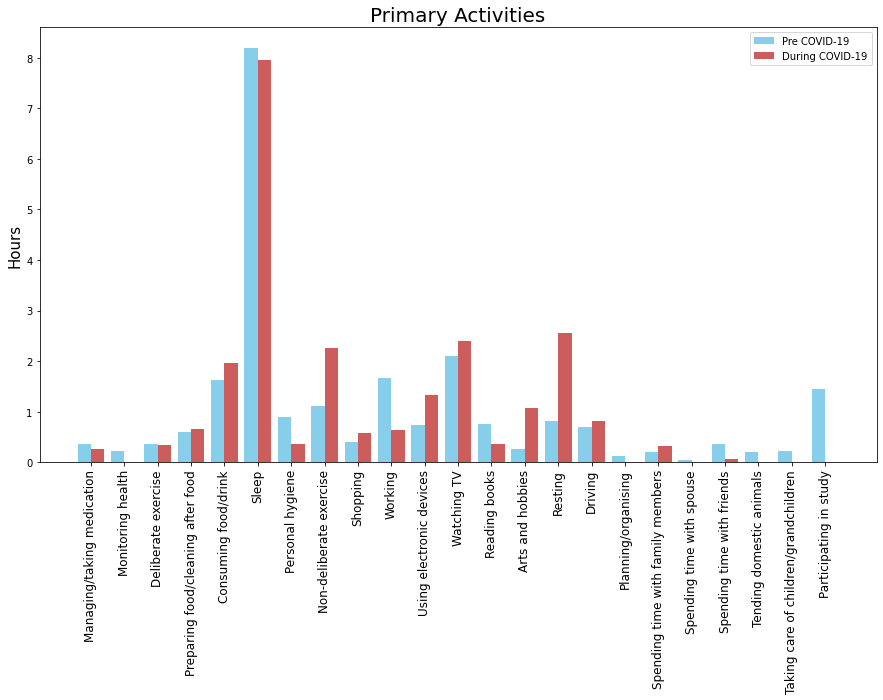

In [213]:
fig, ax = plt.subplots(figsize=(15, 8))
x=np.arange(23)
bar_width = 0.4

prepri = ax.bar(x, pre_pri.mean()[:-1], width=bar_width, label='Pre COVID-19', color = 'SkyBlue')
durpri = ax.bar(x+bar_width, dur_pri.mean()[:-1], width=bar_width, label='During COVID-19', color = 'IndianRed')

ax.set_xticks(x+bar_width/2)
ax.set_xticklabels(pre_pri.columns[1:-1], rotation=90, size=12)
ax.set_title('Primary Activities', size=20)
ax.set_ylabel('Hours', size=15)
ax.legend()

(0.0, 8.5)

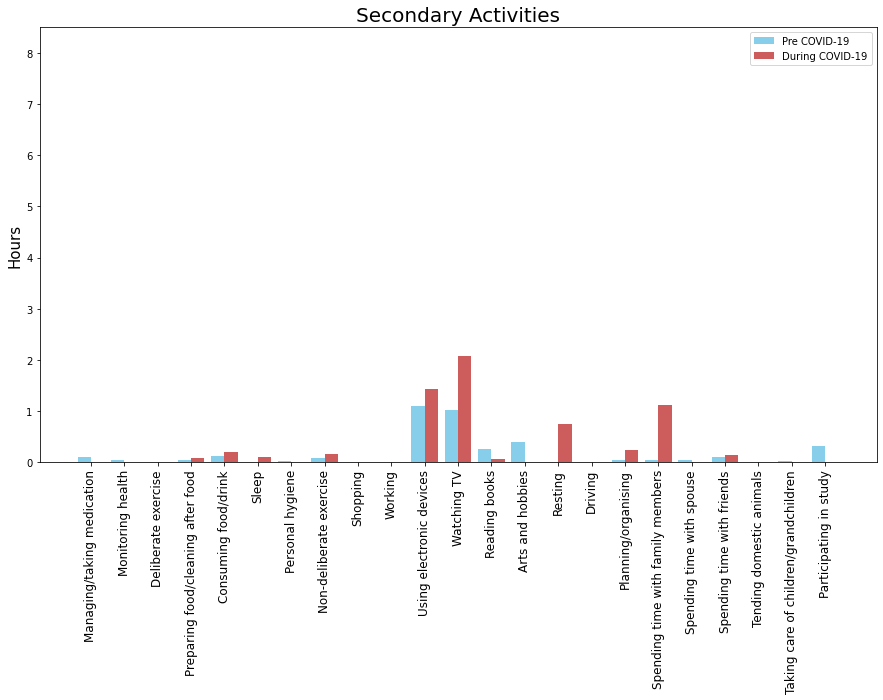

In [214]:
fig, ax = plt.subplots(figsize=(15, 8))
x=np.arange(23)
bar_width = 0.4

presec = ax.bar(x, pre_sec.mean()[:-1], width=bar_width, label='Pre COVID-19', color = 'SkyBlue')
dursec = ax.bar(x+bar_width, dur_sec.mean()[:-1], width=bar_width, label='During COVID-19', color = 'IndianRed')

ax.set_xticks(x+bar_width/2)
ax.set_xticklabels(pre_pri.columns[1:-1], rotation=90, size=12)
ax.set_title('Secondary Activities', size=20)
ax.set_ylabel('Hours', size=15)
ax.legend()
plt.ylim(0, 8.5)

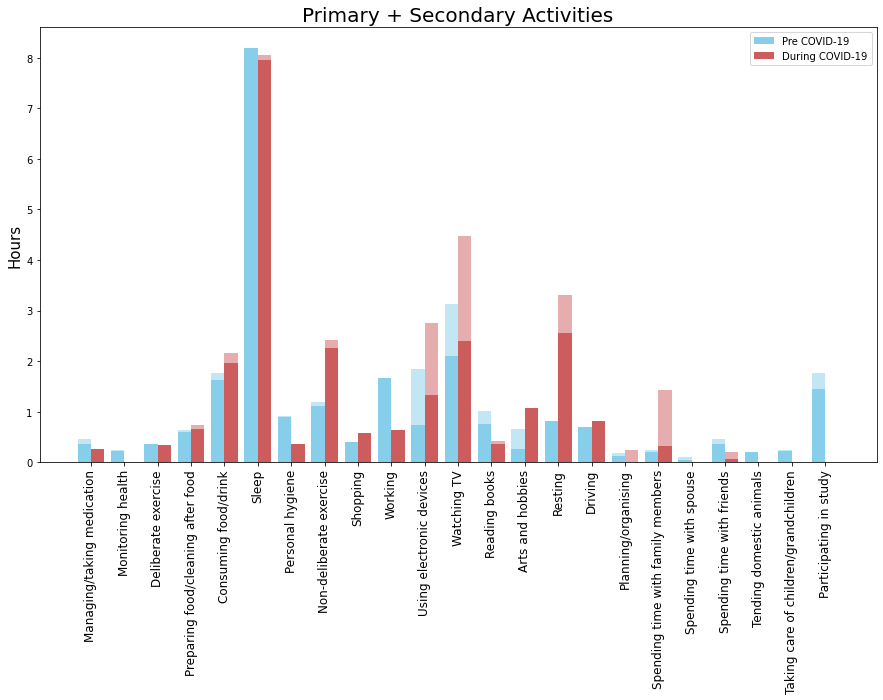

In [215]:
fig, ax = plt.subplots(figsize=(15, 8))
x=np.arange(23)
bar_width = 0.4

pretot = ax.bar(x, pre_total.mean()[:-1], width=bar_width, color = 'SkyBlue', alpha = 0.5)
durtot = ax.bar(x+bar_width, dur_total.mean()[:-1], width=bar_width, color = 'IndianRed', alpha = 0.5)

prepri = ax.bar(x, pre_pri.mean()[:-1], width=bar_width, color = 'SkyBlue', 
                label='Pre COVID-19')
durpri = ax.bar(x+bar_width, dur_pri.mean()[:-1], width=bar_width, color = 'IndianRed', 
                label='During COVID-19')

ax.set_xticks(x+bar_width/2)
ax.set_xticklabels(pre_pri.columns[1:-1], rotation=90, size=12)
ax.set_title('Primary + Secondary Activities', size=20)
ax.set_ylabel('Hours', size=15)
ax.legend()

#### Choose activities which look interesting from the bar graph:

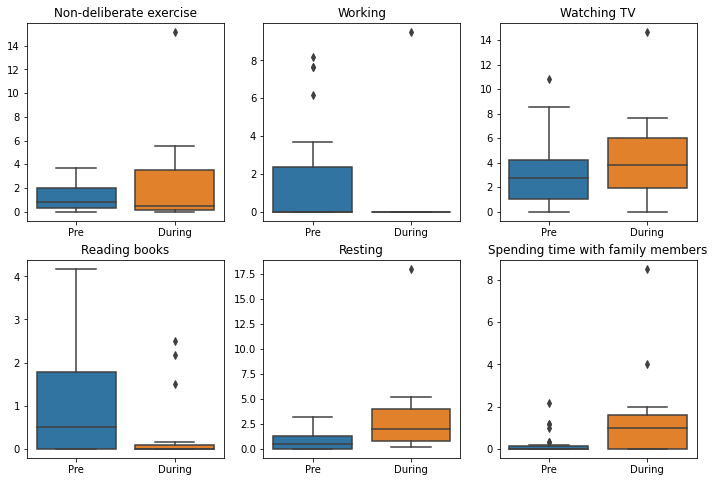

In [216]:
key = ['Non-deliberate exercise', 'Working', 'Watching TV', 'Reading books', 
       'Resting', 'Spending time with family members']

plt.figure(figsize = (12, 8))
for i in range(0, len(key)):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x = 'Period', y = df_total[key[i]], data = df_total)
    plt.title(key[i])
    plt.xlabel('')
    plt.ylabel('')

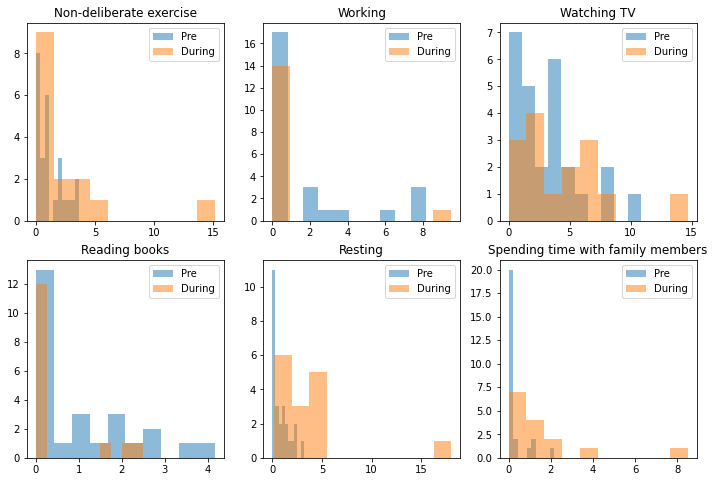

In [217]:
plt.figure(figsize=(12, 8))
for i in range(0, len(key)):
    plt.subplot(2, 3, i+1)
    plt.hist(pre_total[key[i]], alpha=0.5, label='Pre')
    plt.hist(dur_total[key[i]], alpha=0.5, label='During')
    plt.legend()
    plt.title(key[i])

Distributions do not look very nice. This is due to the small sample size of the data.

### Home/Not Home and Alone/Not Alone

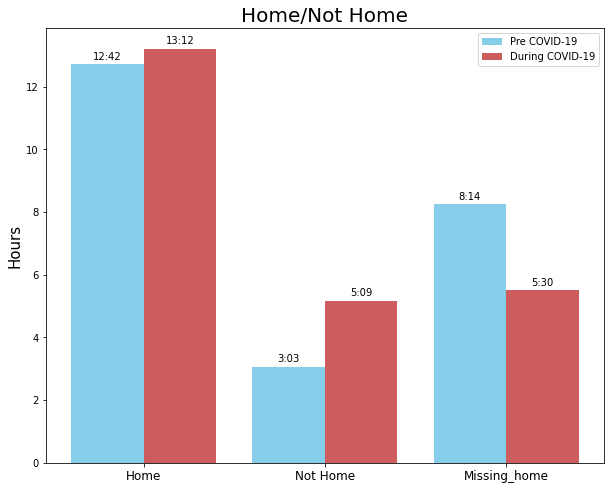

In [218]:
fig, ax = plt.subplots(figsize=(10, 8))
x=np.arange(3)
bar_width = 0.4

prehome = ax.bar(x, pre_home_alone.mean()[:3], width=bar_width, label='Pre COVID-19', color = 'SkyBlue')
durhome = ax.bar(x+bar_width, dur_home_alone.mean()[:3], width=bar_width, label='During COVID-19', color = 'IndianRed')

ax.set_xticks(x+bar_width/2)
ax.set_xticklabels(pre_home_alone.columns[1:], size=12)
ax.set_title('Home/Not Home', size=20)
ax.set_ylabel('Hours', size=15)
ax.legend()

autolabel(prehome)
autolabel(durhome)

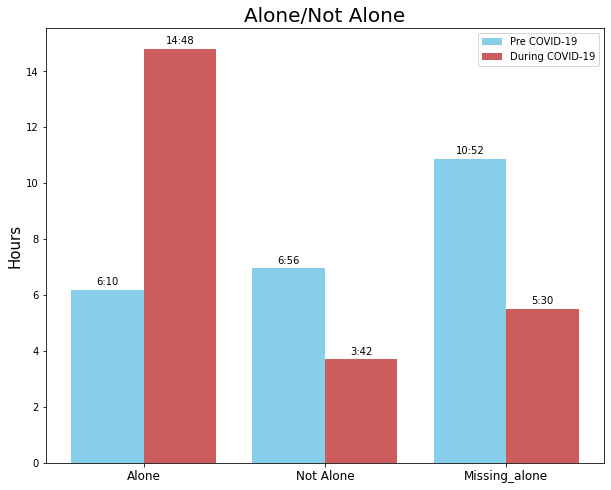

In [219]:
fig, ax = plt.subplots(figsize=(10, 8))
x=np.arange(3)
bar_width = 0.4

prealone = ax.bar(x, pre_home_alone.mean()[3:], width=bar_width, label='Pre COVID-19', color = 'SkyBlue')
duralone = ax.bar(x+bar_width, dur_home_alone.mean()[3:], width=bar_width, label='During COVID-19', color = 'IndianRed')

ax.set_xticks(x+bar_width/2)
ax.set_xticklabels(pre_home_alone.columns[4:], size=12)
ax.set_title('Alone/Not Alone', size=20)
ax.set_ylabel('Hours', size=15)
ax.legend()

autolabel(prealone)
autolabel(duralone)

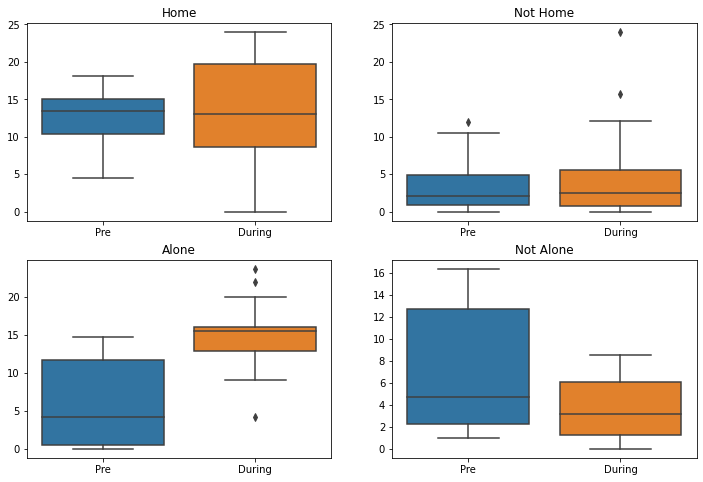

In [220]:
keys = ['Home', 'Not Home', 'Alone', 'Not Alone']

plt.figure(figsize = (12, 8))
for i in range(0, len(keys)):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x = 'Period', y = df_home_alone[keys[i]], data = df_home_alone)
    plt.title(keys[i])
    plt.xlabel('')
    plt.ylabel('')

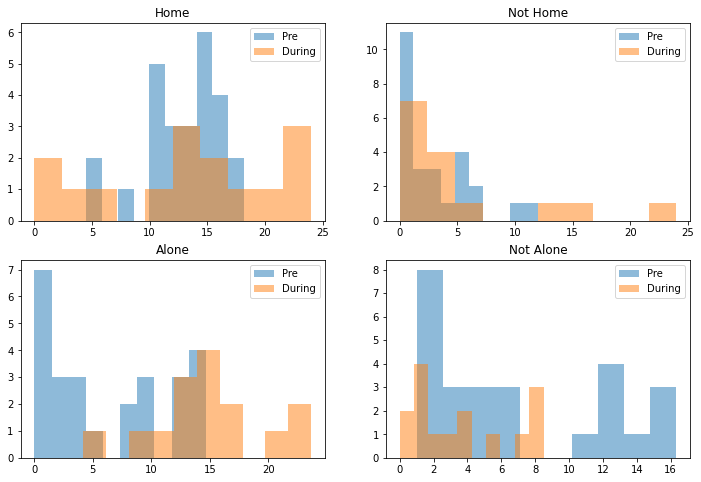

In [221]:
plt.figure(figsize=(12, 8))
for i in range(0, len(keys)):
    plt.subplot(2, 2, i+1)
    plt.hist(pre_home_alone[keys[i]], alpha=0.5, label='Pre')
    plt.hist(dur_home_alone[keys[i]], alpha=0.5, label='During')
    plt.legend()
    plt.title(keys[i])

Data is very obscure due to the small sample size, so statistical tests would be inappropriate. Transformation of the data may help.